In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, strides=1, padding='same', activation='tanh', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, kernel_size=5, strides=1, padding='valid', activation='tanh'),
    layers.AveragePooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dropout(0.4),
    layers.Dense(84, activation='tanh'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_filtered/train',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'cats_and_dogs_filtered/validation',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('lenet5_cats_dogs.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/50
63/63 [==============================] - 3s 38ms/step - loss: 0.6954 - accuracy: 0.5060 - val_loss: 0.6960 - val_accuracy: 0.4915
Epoch 2/50
63/63 [==============================] - 2s 38ms/step - loss: 0.6929 - accuracy: 0.5190 - val_loss: 0.6865 - val_accuracy: 0.5584
Epoch 3/50
63/63 [==============================] - 2s 37ms/step - loss: 0.6897 - accuracy: 0.5310 - val_loss: 0.6857 - val_accuracy: 0.5624
Epoch 4/50
63/63 [==============================] - 2s 37ms/step - loss: 0.6879 - accuracy: 0.5490 - val_loss: 0.6859 - val_accuracy: 0.5475
Epoch 5/50
63/63 [==============================] - 2s 38ms/step - loss: 0.6860 - accuracy: 0.5695 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 6/50
63/63 [==============================] - 2s 38ms/step - loss: 0.6933 - accuracy: 0.5240 - val_loss: 0.6900 - val_accuracy: 0.5115
Epoch 7/50
63/63 [==============================] - 2s 37ms/step - loss: 0.6865 - accuracy: 0.5500 - val_loss: 0.6844 - val_accuracy: 0.5425
Epoch 8/50
63

In [17]:
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"Validation Accuracy: {val_acc:.4f}")

32/32 [==============================] - 1s 21ms/step - loss: 0.6831 - accuracy: 0.5774
Validation Accuracy: 0.5774


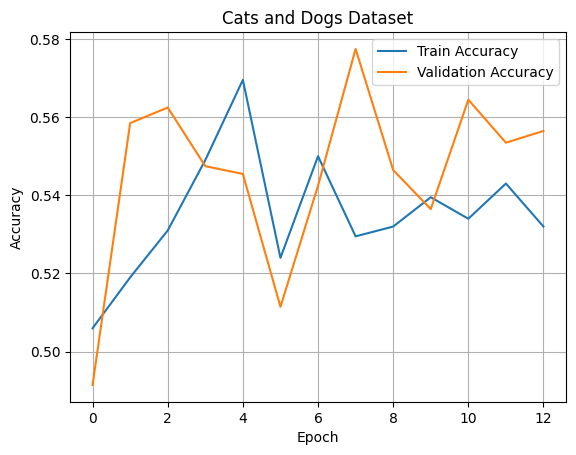

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Cats and Dogs Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
images, labels = next(val_generator)

In [20]:
predictions = model.predict(images)

1/1 [==============================] - 0s 36ms/step


In [21]:
predicted_labels = (predictions > 0.5).astype(int).flatten()

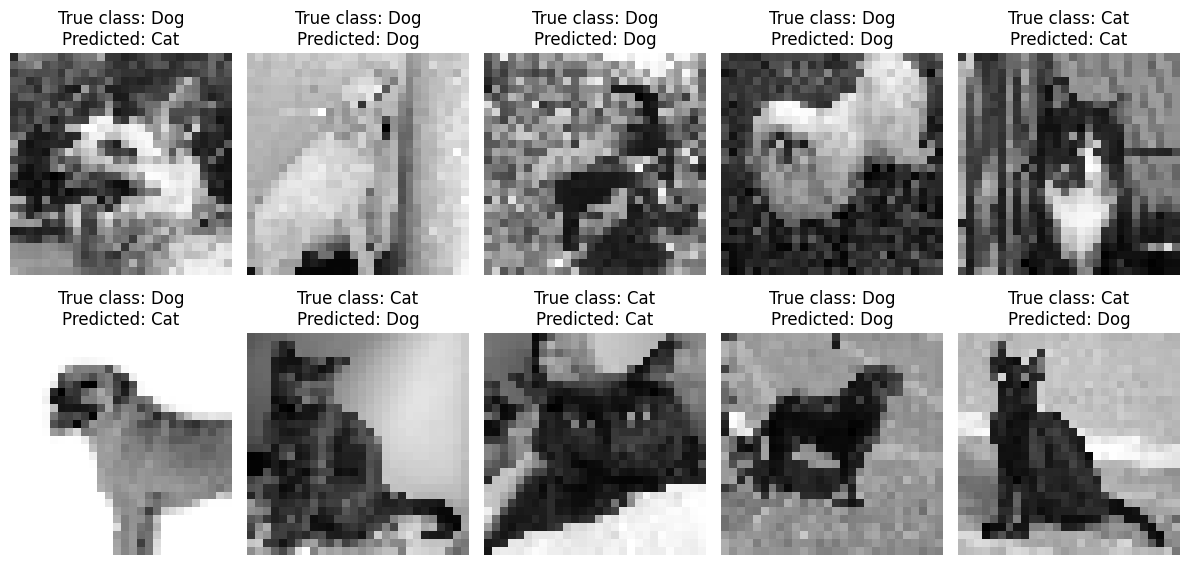

In [22]:
class_names = ['Cat', 'Dog']

plt.figure(figsize=(12, 6))
for i in range(10): 
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    true_label = class_names[int(labels[i])]
    pred_label = class_names[predicted_labels[i]]
    plt.title(f"True class: {true_label}\nPredicted: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
model_alex = models.Sequential([
    layers.Conv2D(96, kernel_size=11, strides=4, padding='valid', activation='relu', input_shape=(227, 227, 3)),
    layers.MaxPooling2D(pool_size=3, strides=2),

    layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),

    layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

In [24]:
model_alex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model_alex.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)      

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    'Face_Mask/Face Mask Dataset/Train',
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'Face_Mask/Face Mask Dataset/Validation',
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'Face_Mask/Face Mask Dataset/Test',
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_alex = model_alex.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/50
313/313 [==============================] - 55s 176ms/step - loss: 0.1891 - accuracy: 0.9353 - val_loss: 0.1411 - val_accuracy: 0.9488
Epoch 2/50
313/313 [==============================] - 55s 176ms/step - loss: 0.1710 - accuracy: 0.9448 - val_loss: 0.1838 - val_accuracy: 0.9425
Epoch 3/50
313/313 [==============================] - 55s 176ms/step - loss: 0.1636 - accuracy: 0.9454 - val_loss: 0.0951 - val_accuracy: 0.9650
Epoch 4/50
313/313 [==============================] - 55s 175ms/step - loss: 0.1593 - accuracy: 0.9467 - val_loss: 0.1390 - val_accuracy: 0.9475
Epoch 5/50
313/313 [==============================] - 55s 176ms/step - loss: 0.1499 - accuracy: 0.9514 - val_loss: 0.1164 - val_accuracy: 0.9638
Epoch 6/50
313/313 [==============================] - 55s 175ms/step - loss: 0.1511 - accuracy: 0.9467 - val_loss: 0.1359 - val_accuracy: 0.9488
Epoch 7/50
313/313 [==============================] - 55s 176ms/step - loss: 0.1453 - accuracy: 0.9516 - val_loss: 0.1189 - val_ac

In [31]:
test_loss, test_acc = model_alex.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

31/31 [==============================] - 1s 31ms/step - loss: 0.1058 - accuracy: 0.9698
Test accuracy: 0.9698


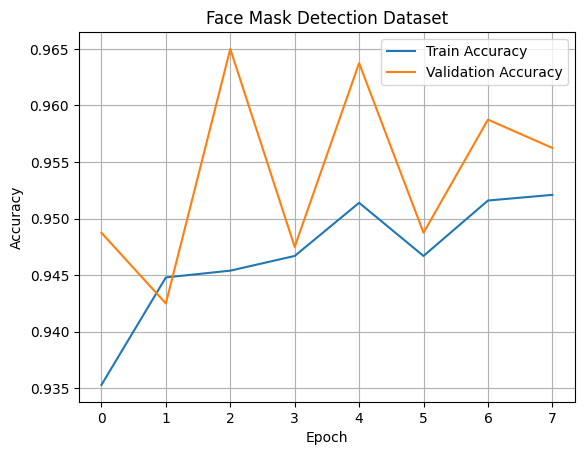

In [32]:
plt.plot(history_alex.history['accuracy'], label='Train Accuracy')
plt.plot(history_alex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Face Mask Detection Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

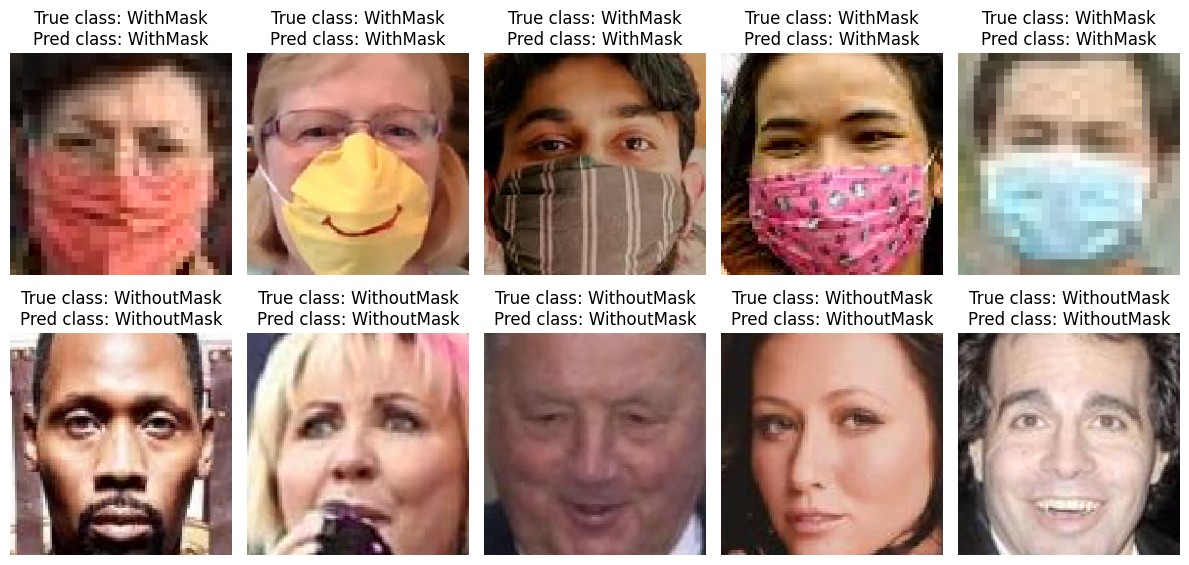

In [54]:
import numpy as np
import matplotlib.pyplot as plt

class_labels = list(test_generator.class_indices.keys())

test_generator.reset()

images_list = []
true_labels_list = []
pred_labels_list = []

num_samples_per_class = 5
collected_counts = {cls: 0 for cls in class_labels}

batch_index = 0
max_batches = len(test_generator)

while min(collected_counts.values()) < num_samples_per_class and batch_index < max_batches:
    images_batch, labels_batch = test_generator[batch_index]
    batch_size = len(images_batch)
    
    for i in range(batch_size):
        true_class = class_labels[int(labels_batch[i])]
        if collected_counts[true_class] < num_samples_per_class:
            images_list.append(images_batch[i])
            true_labels_list.append(true_class)
            pred_labels_list.append(class_labels[predictions[batch_index * batch_size + i]])
            collected_counts[true_class] += 1
        
        if min(collected_counts.values()) >= num_samples_per_class:
            break
    batch_index += 1

plt.figure(figsize=(12, 6))
for i in range(len(images_list)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_list[i])
    plt.title(f"True class: {true_labels_list[i]}\nPred class: {pred_labels_list[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()